# SUPPORT VECTOR CLASSIFIER

La implementación de sklearn la podemos encontrar [acá](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

Vamos a trabajar con el siguiente dataset: 

https://www.kaggle.com/rakeshrau/social-network-ads

Las siguientes lineas lo descargan a su entorno de colab y lo importan como dataframe de pandas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1aaPZi2Kc8K8ytNUYhOQl9s0xlj0BNtmF' -O ads.csv

--2021-10-14 00:12:03--  https://docs.google.com/uc?export=download&id=1aaPZi2Kc8K8ytNUYhOQl9s0xlj0BNtmF
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.101, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e19sagrpgbd916ni3c5fcjfjfflqulas/1634170275000/14260194928165318342/*/1aaPZi2Kc8K8ytNUYhOQl9s0xlj0BNtmF?e=download [following]
--2021-10-14 00:12:04--  https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e19sagrpgbd916ni3c5fcjfjfflqulas/1634170275000/14260194928165318342/*/1aaPZi2Kc8K8ytNUYhOQl9s0xlj0BNtmF?e=download
Resolving doc-10-74-docs.googleusercontent.com (doc-10-74-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc-10-74-docs.googleusercontent.com (doc-10-74-docs.g

In [3]:
df = pd.read_csv("/content/ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Para nuestro problema, sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary`. Y como target a la columna `Purchased`

Separar en X e Y quedándonos con esas columnas:

In [5]:
X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 4].values

In [6]:
Y.shape

(400,)

Luego, debemos separar los datos de entrenamiento de los datos de testing, mediante la función `train_test_split`.

Separar los datos en train-test:

Utilizar un test_size de 0.25 y random state de 0

In [6]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Además, vamos a proceder a estandarizar los datos.

Utilizar un standardScaler. Recuerden hacer fit solo sobre train.

In [7]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

Vamos a realizar el entrenamiento de nuestra SVM.

Importar SVC de sklearn y entrenarlo.

Utilizar un valor de C=1, un kernel='linear' y un random_state de 0.

In [8]:
from sklearn.svm import SVC

classifier = SVC(C = 1, kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Una vez finalizado el entrenamiento, podemos realizar las predicciones sobre los datos de testing.

Guardar en una variable llamada Y_Pred las predicciones sobre el set de test.

In [9]:
Y_Pred = classifier.predict(X_Test)

Seguidamente, vamos a visualizar los resultados mediante:
 
* `Matriz de Confusión`
* `Reporte de Clasificación`
* `Gráfico de límites de Decisión`

Graficar la matriz de confusión:

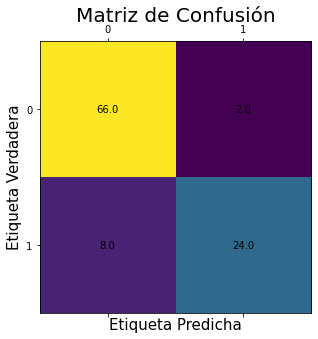

In [10]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

Imprimir el classification report utilizando la función de sklearn:

In [11]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



El siguiente código, no es necesario mirarlo en detalle. Vamos a simplemente ejecutarlo para visualizar.

Es importante que tengan las variables definidas con los nombres:

X_Train, Y_Train. Si no, deberán modificar el código para poner los nombres que ustedes tengan.

Set de train:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


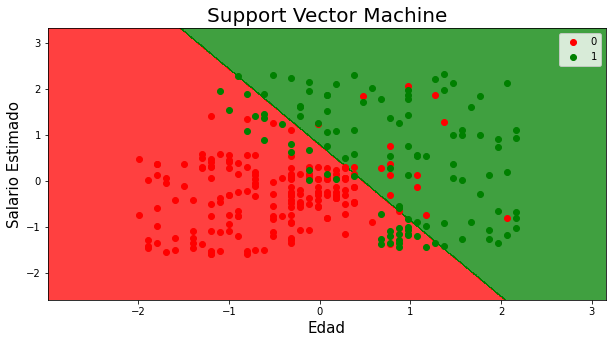

In [12]:
from matplotlib.colors import ListedColormap


def plot_decision_boundaries(X, Y):
  X_Set, Y_Set = X, Y
  X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

  plt.figure(figsize=(10,5))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(Y_Set)):
      plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Support Vector Machine', fontsize=20)
  plt.xlabel('Edad', fontsize=15)
  plt.ylabel('Salario Estimado', fontsize=15)
  plt.legend()
  plt.show()

plot_decision_boundaries(X_Train, Y_Train)

Set de test:

(X_Test, Y_Test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


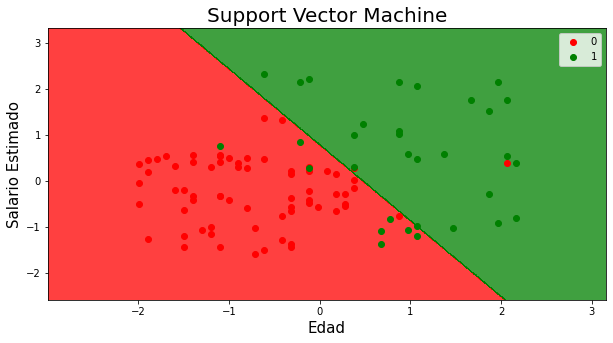

In [13]:
plot_decision_boundaries(X_Test, Y_Test)

Modificar el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


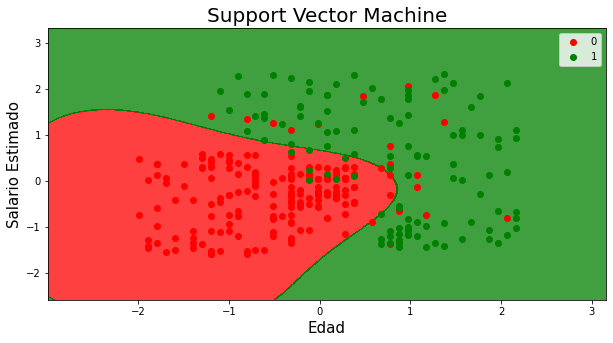

In [14]:
classifier = SVC(C = 1, kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, Y_Train)

Y_Pred = classifier.predict(X_Test)

plot_decision_boundaries(X_Train, Y_Train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


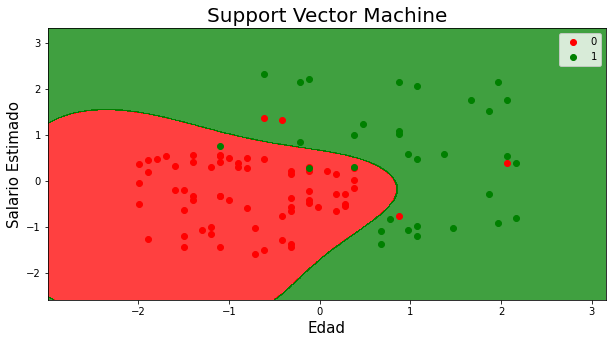

In [15]:
plot_decision_boundaries(X_Test, Y_Test)

Modificar el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


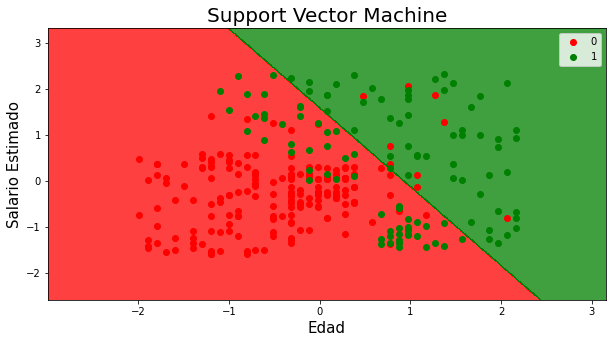

In [16]:
classifier = SVC(C = 0.01, kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

Y_Pred = classifier.predict(X_Test)

plot_decision_boundaries(X_Train, Y_Train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


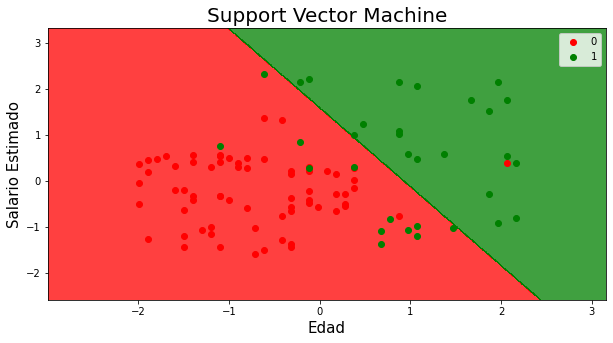

In [17]:
plot_decision_boundaries(X_Test, Y_Test)

Utilizando GridSearchCV, buscar los mejores valores para c y kernel.

Probar: 

C: 0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1

kernel: "linear", "poly", "rbf", "sigmoid"

In [19]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters = {
    'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1],
    'kernel': ["linear", "poly", "rbf", "sigmoid"]
}

clf = GridSearchCV(SVC(), parameters)
clf.fit(X_Train, Y_Train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

¿Cuáles son los mejores hiperparámetros?

In [23]:
clf.best_estimator_

SVC(C=0.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

¿Qué score obtiene el mejor clasificador?

In [24]:
clf.best_score_

0.9066666666666666